In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score 

In [2]:
def path_rephraser(path: str) -> str:
    # rephrases the path to be OS independent
    return path.replace("\\", "/")


In [5]:
path = path_rephraser(r"C:\Users\jj402\Desktop\ML\employee_attrition_prediction\data\WA_Fn-UseC_-HR-Employee-Attrition.csv")
df = pd.read_csv(path)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [6]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       1470 non-null   int64
 1   Attrition                 1470 non-null   str  
 2   BusinessTravel            1470 non-null   str  
 3   DailyRate                 1470 non-null   int64
 4   Department                1470 non-null   str  
 5   DistanceFromHome          1470 non-null   int64
 6   Education                 1470 non-null   int64
 7   EducationField            1470 non-null   str  
 8   EmployeeCount             1470 non-null   int64
 9   EmployeeNumber            1470 non-null   int64
 10  EnvironmentSatisfaction   1470 non-null   int64
 11  Gender                    1470 non-null   str  
 12  HourlyRate                1470 non-null   int64
 13  JobInvolvement            1470 non-null   int64
 14  JobLevel                  1470 non-null   int64
 15

In [23]:
df['Attrition'].value_counts(normalize = True)*100

Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

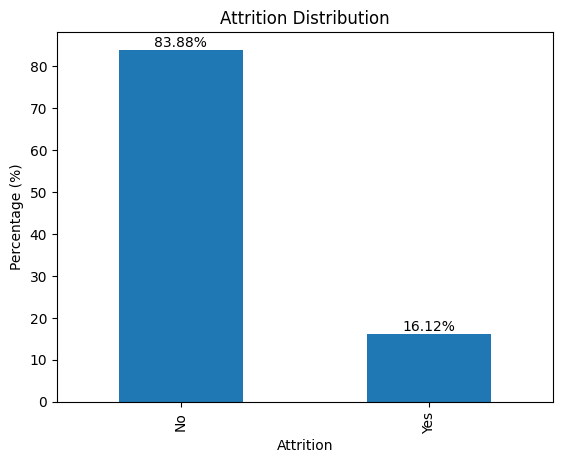

In [24]:
import matplotlib.pyplot as plt

# Calculate percentages
target_pct = df['Attrition'].value_counts(normalize=True) * 100

# Plot
ax = target_pct.plot(kind='bar')

plt.title('Attrition Distribution')
plt.xlabel('Attrition')
plt.ylabel('Percentage (%)')

# Add labels on bars
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.2f}%',
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha='center',
        va='bottom'
    )

plt.show()


In [7]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
df.shape

(1470, 35)

In [10]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='str')

In [19]:
# Quick and dirty approach for the preprocessing of the baseline model

# 1. Separate the target and features
y = df["Attrition"].apply(lambda x:1 if x=="Yes" else 0)
X = df.drop('Attrition', axis = 1)

# 2. Drop all non-numeric columns for today's baseline model
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# 3. Drop rows with missing values
X_final = X_numeric.dropna()
y_final = y[X_final.index] #Keeping y in sync with dropped rows of X

In [20]:
# Smarter approach of preprocessing using a simple imputer 

# 1. Select numeric features
X_numeric = X.select_dtypes(include=['int64', 'float64'])

# 2. Define the Imputer with what values to impute the missing values 
imputer = SimpleImputer(strategy = 'median')

# 3. Fit and transform 
X_imputed_array = imputer.fit_transform(X_numeric)

# 4. Convert the result to Dataframe 
X_imputed = pd.DataFrame(X_imputed_array, columns = X_numeric.columns)

In [21]:
X_imputed

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,1102.0,1.0,2.0,1.0,1.0,2.0,94.0,3.0,2.0,...,1.0,80.0,0.0,8.0,0.0,1.0,6.0,4.0,0.0,5.0
1,49.0,279.0,8.0,1.0,1.0,2.0,3.0,61.0,2.0,2.0,...,4.0,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0
2,37.0,1373.0,2.0,2.0,1.0,4.0,4.0,92.0,2.0,1.0,...,2.0,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0
3,33.0,1392.0,3.0,4.0,1.0,5.0,4.0,56.0,3.0,1.0,...,3.0,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0
4,27.0,591.0,2.0,1.0,1.0,7.0,1.0,40.0,3.0,1.0,...,4.0,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,884.0,23.0,2.0,1.0,2061.0,3.0,41.0,4.0,2.0,...,3.0,80.0,1.0,17.0,3.0,3.0,5.0,2.0,0.0,3.0
1466,39.0,613.0,6.0,1.0,1.0,2062.0,4.0,42.0,2.0,3.0,...,1.0,80.0,1.0,9.0,5.0,3.0,7.0,7.0,1.0,7.0
1467,27.0,155.0,4.0,3.0,1.0,2064.0,2.0,87.0,4.0,2.0,...,2.0,80.0,1.0,6.0,0.0,3.0,6.0,2.0,0.0,3.0
1468,49.0,1023.0,2.0,3.0,1.0,2065.0,4.0,63.0,2.0,2.0,...,4.0,80.0,0.0,17.0,3.0,2.0,9.0,6.0,0.0,8.0


In [27]:
# Training of the baseline model

# 1. Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_final, test_size = 0.2, random_state = 42, stratify = y_final)

# 2. Define the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Score 
preds = model.predict(X_test)
print(f"Baseline Accuracy: {accuracy_score(y_test, preds):.2%}")


Baseline Accuracy: 85.37%


c:\Users\jj402\anaconda3\envs\ml_env\Lib\site-packages\sklearn\linear_model\_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

roc_auc = roc_auc_score(y_test, y_proba)
recall = recall_score(y_test, y_pred)

print(f"ROC-AUC: {roc_auc:.3f}")
print(f"Recall: {recall:.3f}")

ROC-AUC: 0.681
Recall: 0.106


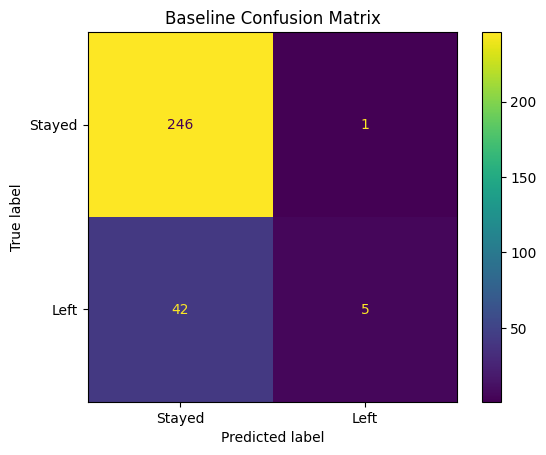

In [30]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, preds)
ConfusionMatrixDisplay(cm, display_labels=['Stayed', 'Left']).plot()
plt.title("Baseline Confusion Matrix")
plt.show()

In [31]:
# Check for columns where everyone has the same value
constant_columns = [col for col in X_final.columns if X_final[col].nunique() <= 1]
print(f"Constant columns to drop: {constant_columns}")
# (In the IBM data, 'StandardHours' and 'EmployeeCount' are usually constants)

Constant columns to drop: ['EmployeeCount', 'StandardHours']


In [32]:
# Combine numeric X and y temporarily
temp_df = X_final.copy()
temp_df['Target'] = y_final.values

# Look at correlations
correlations = temp_df.corr()['Target'].sort_values(ascending=False)
print(correlations)

Target                      1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
EmployeeNumber             -0.010577
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
EmployeeCount                    NaN
StandardHours                    NaN
N

### Day 1 Summary

- The target variable is highly imbalanced (~84% no vs ~16% yes).
- A baseline Logistic Regression model was trained using minimal preprocessing.
- The model achieved ROC-AUC of ~0.68, indicating some ability to rank risk.
- Recall was 0.106 due to class imbalance and default thresholding.
- This establishes a weak but necessary baseline to improve upon.